In [4]:
import pandas as pd

In [14]:
pd.read_csv("폐암.csv")

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


Accuracy: 1.0
Confusion Matrix for logistic regression:
[[181   0]
 [  0 119]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



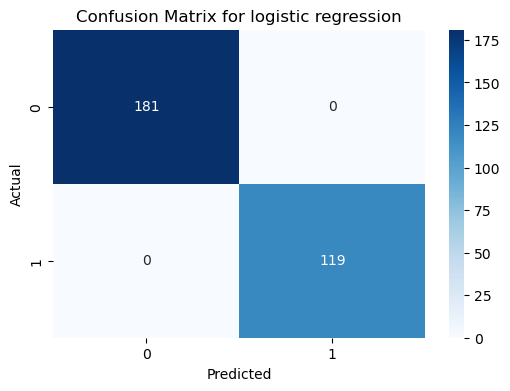

In [19]:
# 1. 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter Notebook에서 그래프를 노트북 내에 표시하기 위해
%matplotlib inline

# 2. CSV 파일 읽어오기 (파일이 현재 작업 디렉토리에 있어야 함)
data = pd.read_csv('폐암.csv')  # encoding 옵션은 파일에 따라 'utf-8' 또는 'cp949'로 변경

# 3. 이진 분류용 타겟 변수 생성
# Level이 0 또는 1이면 Low/Medium (0), 2이면 High (1)
data['target'] = data['Level'].apply(lambda x: 0 if x in [0, 1] else 1)

# 4. 특성과 타겟 변수 지정
# 원래의 'Level' 열은 제거하고, 새로 생성한 'target'을 예측 대상으로 사용
X = data.drop(columns=['Level', 'target'])
y = data['target']

# 5. 학습 데이터와 테스트 데이터로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. 특성 스케일링 (표준화)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. 로지스틱 회귀 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, solver='liblinear')  # solver는 작은 데이터셋에 적합한 'liblinear' 사용
model.fit(X_train_scaled, y_train)

# 8. 예측 및 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix for logistic regression:")
print(cm)
print("Classification Report:")
print(cr)

# 9. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for logistic regression")
plt.show()


Accuracy: 87.00%

Confusion Matrix:
[[170  21]
 [ 18  91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       191
           1       0.81      0.83      0.82       109

    accuracy                           0.87       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300



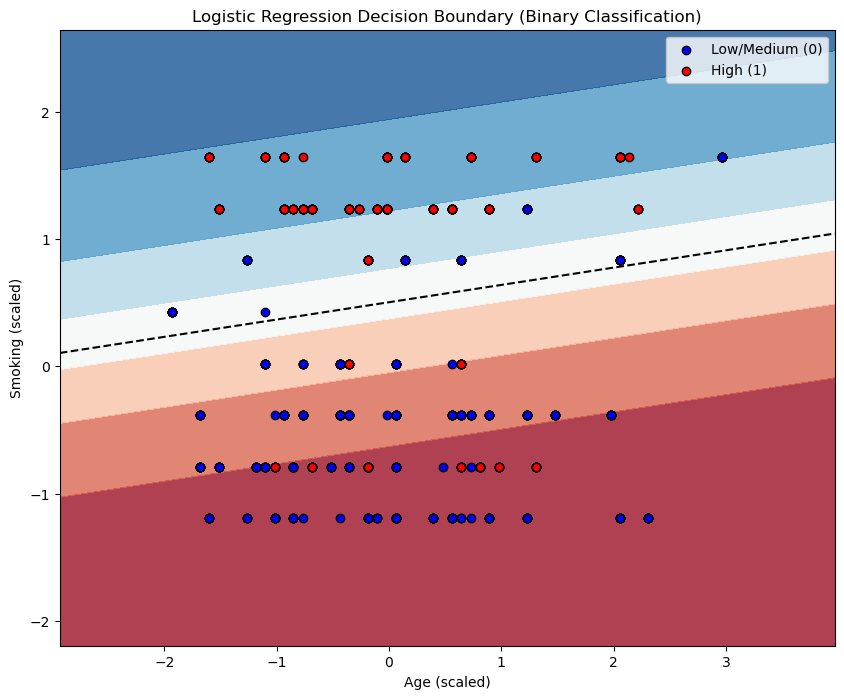

In [39]:
data = pd.read_csv('폐암.csv')

# 이진 분류용 타겟 변수 생성
# 여기서는 'Level'이 2이면 High (1), 그 외(Low/Medium)는 0으로 가정합니다.
data['target'] = data['Level'].apply(lambda x: 1 if x == 2 else 0)

# 2D 시각화를 위해 두 개의 피처 선택 (예: 'Age'와 'Smoking')
features = ['Age', 'Smoking']
X = data[features]
y = data['target']

# 데이터 분할 (학습: 70%, 테스트: 30%; stratify로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 피처 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_scaled, y_train)

# 테스트 데이터 예측 및 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 결정 경계 시각화를 위한 meshgrid 생성
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# 각 격자점에 대해 양성 클래스(High, 1)의 확률 예측
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# 결정 경계 및 데이터 포인트 시각화
plt.figure(figsize=(10, 8))
# 확률에 따른 컬러맵 (결정 경계 주변 부드러운 변화)
plt.contourf(xx, yy, probs, alpha=0.8, cmap=plt.cm.RdBu)
# 임계값 0.5에서의 결정 경계
plt.contour(xx, yy, probs, levels=[0.5], colors='k', linestyles='--')
# 학습 데이터 포인트 표시 (클래스별 색상)
plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1],
            c='blue', edgecolor='k', label='Low/Medium (0)')
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1],
            c='red', edgecolor='k', label='High (1)')
plt.xlabel('Age (scaled)')
plt.ylabel('Smoking (scaled)')
plt.title('Logistic Regression Decision Boundary (Binary Classification)')
plt.legend()
plt.show()

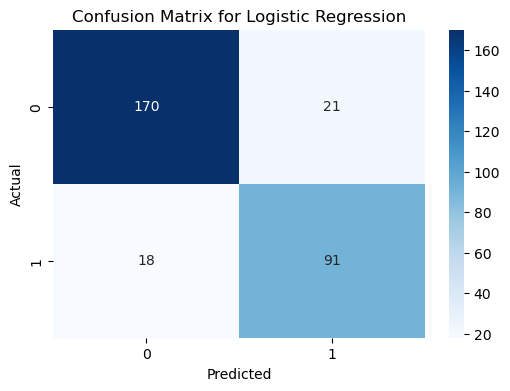

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 예를 들어, 로지스틱 회귀 모델로부터 y_pred를 얻은 경우:
# y_pred = model.predict(X_test_scaled)
# y_test는 실제 라벨(0과 1)입니다.

# 1. 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 2. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

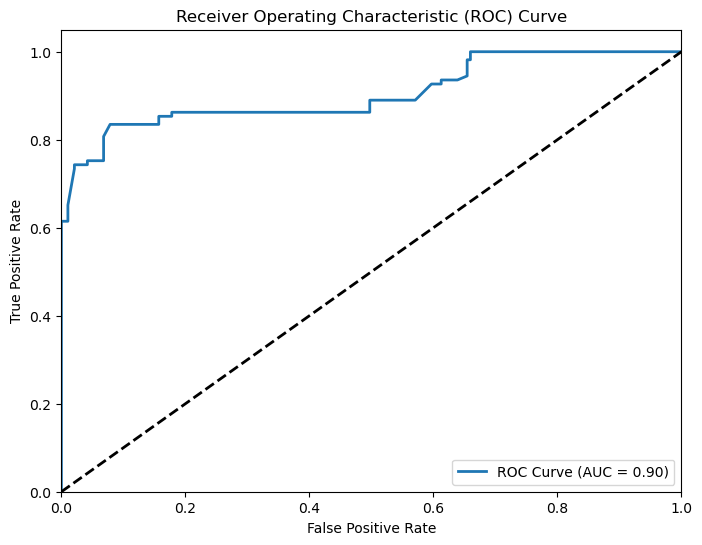

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 모델이 예측한 양성 클래스(1)의 확률 계산
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# ROC 커브를 위한 False Positive Rate(FPR)와 True Positive Rate(TPR) 계산
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# AUC (Area Under the Curve) 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 무작위 분류기의 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 89.67%

Confusion Matrix:
[[179  12]
 [ 19  90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       191
           1       0.88      0.83      0.85       109

    accuracy                           0.90       300
   macro avg       0.89      0.88      0.89       300
weighted avg       0.90      0.90      0.90       300



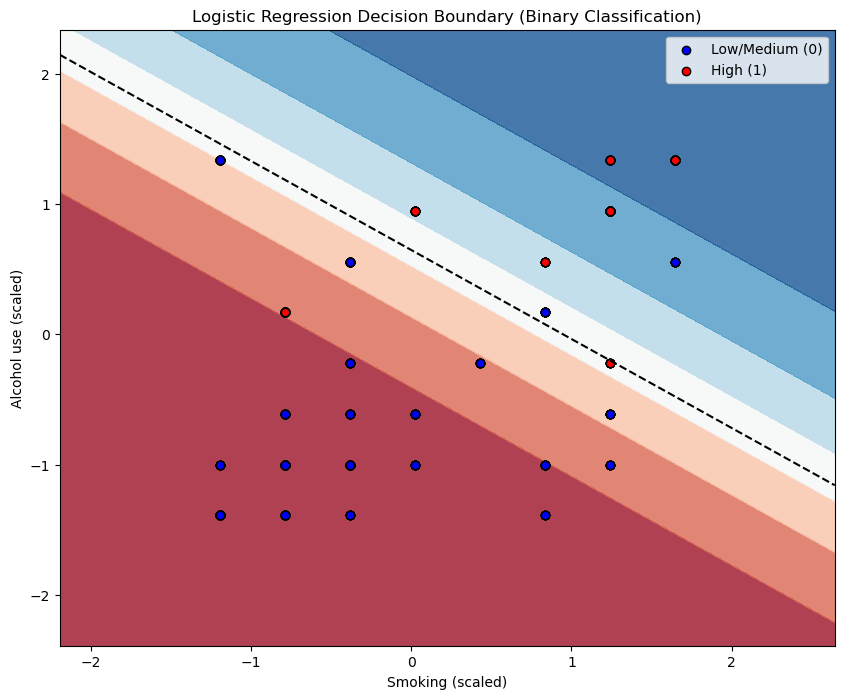

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# 2. 이진 분류용 타겟 변수 생성: Level이 2이면 High(1), 그 외는 Low/Medium(0)
df['target'] = df['Level'].apply(lambda x: 1 if x == 2 else 0)

# 3. 사용할 두 특성 선택: Smoking, Alcohol use
X = df[['Smoking', 'Alcohol use']]
y = df['target']

# 4. 학습/테스트 데이터 분할 (70% 학습, 30% 테스트; 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

# 5. 특성 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_scaled, y_train)

# 7. 예측 및 모델 평가
y_pred = model.predict(X_test_scaled)

# 정확도(Accuracy)와 혼동 행렬, 분류 리포트
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 8. 결정 경계 시각화를 위한 meshgrid 생성
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# 9. 각 격자점에 대한 High(1) 클래스 확률 예측
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# 10. 결정 경계 및 데이터 포인트 시각화
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, probs, alpha=0.8, cmap=plt.cm.RdBu)
plt.contour(xx, yy, probs, levels=[0.5], colors='k', linestyles='--')

# 학습 데이터 포인트 표시 (Low/Medium: 파란색, High: 빨간색)
plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1],
            c='blue', edgecolor='k', label='Low/Medium (0)')
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1],
            c='red', edgecolor='k', label='High (1)')

plt.xlabel('Smoking (scaled)')
plt.ylabel('Alcohol use (scaled)')
plt.title('Logistic Regression Decision Boundary (Binary Classification)')
plt.legend()
plt.show()


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(df['Level'].value_counts())
print(df['target'].value_counts())


Level
2    365
1    332
0    303
Name: count, dtype: int64
target
0    1000
Name: count, dtype: int64


=== Confusion Matrix ===
[[191   0]
 [  0 109]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



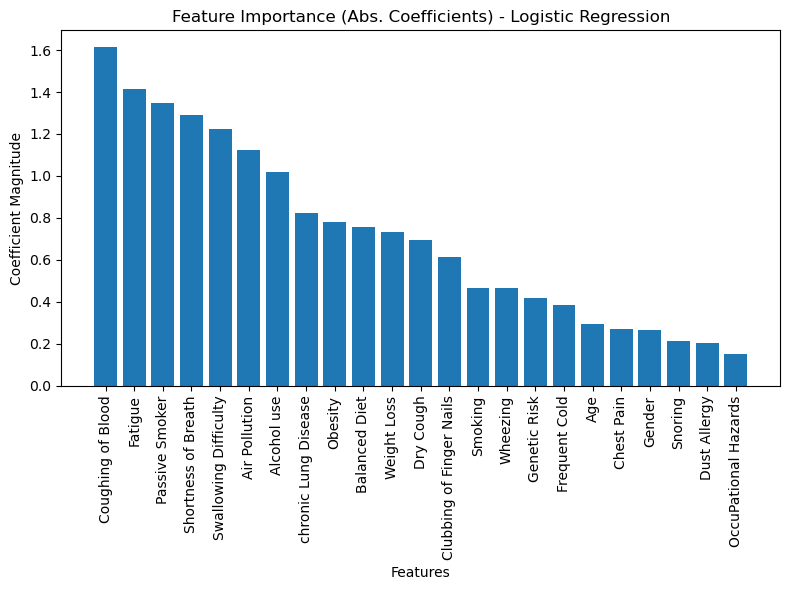

Train Accuracy: 1.000
Test Accuracy : 1.000


In [39]:
df = pd.read_csv('폐암.csv')  # 실제 파일명/경로로 수정하세요

# 2. 타깃 변수를 (0,1) vs 2로 이분화
#    Level이 2이면 1(고위험), Level이 0 또는 1이면 0(저위험/중위험)으로 설정
df['target'] = np.where(df['Level'] == 2, 1, 0)

# (필요에 따라 ID나 index 열이 있다면 제거)
# df.drop(['Patient Id', 'index'], axis=1, inplace=True, errors='ignore')

# 3. 독립변수(X), 종속변수(y) 분리
X = df.drop(['Level', 'target'], axis=1)
y = df['target']

# 4. 학습 / 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # 클래스 비율 유지 (0/1)
)

# 5. 스케일링 (선택)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test_scaled)

print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 8. 변수 중요도 시각화
#    로지스틱 회귀는 coef_로 각 피처의 계수를 제공
coefs = model.coef_[0]  # shape: (n_features,)
feature_names = X.columns

# 계수의 절댓값이 클수록 해당 변수가 타깃에 큰 영향
abs_coefs = np.abs(coefs)

# 중요도 순으로 정렬
sorted_idx = np.argsort(abs_coefs)[::-1]  # 내림차순
sorted_feature_names = feature_names[sorted_idx]
sorted_coefs = coefs[sorted_idx]
sorted_abs_coefs = abs_coefs[sorted_idx]

# 그래프
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_coefs)), sorted_abs_coefs)
plt.xticks(range(len(sorted_coefs)), sorted_feature_names, rotation=90)
plt.title('Feature Importance (Abs. Coefficients) - Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.tight_layout()
plt.show()

# 9. 정확도(선택)
train_acc = model.score(X_train_scaled, y_train)
test_acc = model.score(X_test_scaled, y_test)
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy : {test_acc:.3f}")

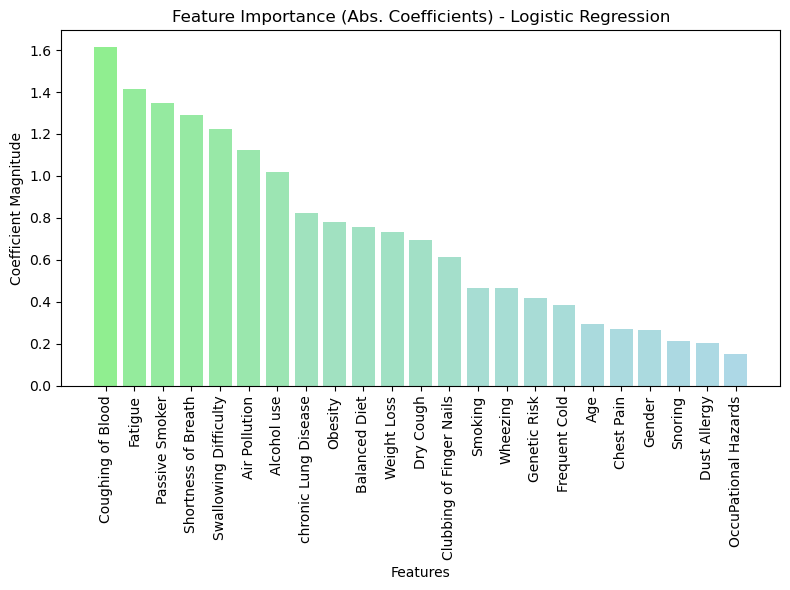

Train Accuracy: 1.000
Test Accuracy : 1.000


In [49]:
start_color = np.array([173, 216, 230]) / 255.0  # lightblue (R,G,B)/255
end_color   = np.array([144, 238, 144]) / 255.0  # lightblue (R,G,B)/255


min_val = sorted_abs_coefs[-1]  # 가장 끝 = 최소값
max_val = sorted_abs_coefs[0]   # 맨 앞 = 최대값

colors = []
for val in sorted_abs_coefs:
    # 0~1 사이로 정규화 (가장 작은 계수=0, 가장 큰 계수=1)
    if max_val == min_val:
        ratio = 0.5  # 혹시 모든 값이 같다면 중간값
    else:
        ratio = (val - min_val) / (max_val - min_val)
    
    # start_color와 end_color 사이를 선형보간(Linear Interpolation)
    color = start_color + ratio * (end_color - start_color)  
    color = tuple(color)  # (R,G,B)
    colors.append(color)

plt.rcdefaults()  # 혹시 모를 스타일 충돌 방지
plt.figure(figsize=(8, 6))

plt.bar(range(len(sorted_abs_coefs)), sorted_abs_coefs, color=colors)
plt.xticks(range(len(sorted_abs_coefs)), sorted_feature_names, rotation=90)
plt.title('Feature Importance (Abs. Coefficients) - Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.tight_layout()
plt.show()

# 9. 정확도(선택)
train_acc = model.score(X_train_scaled, y_train)
test_acc = model.score(X_test_scaled, y_test)
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy : {test_acc:.3f}")